Note: you may need to restart the kernel to use updated packages.
First row c: [ 2 -1  0  1  0  0 -1  0]
Eigenvalues: [1.      +0.j 0.585786-1.j 3.      +2.j 3.414214+1.j 1.      +0.j
 3.414214-1.j 3.      -2.j 0.585786+1.j]


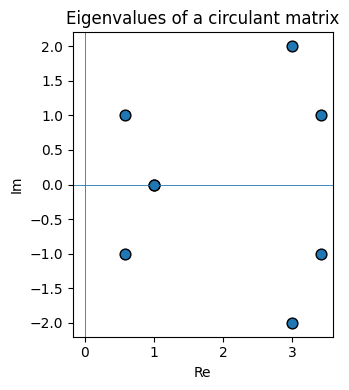

In [1]:
%pip install numpy matplotlib

import numpy as np
from numpy.fft import fft
import matplotlib.pyplot as plt

def circulant_from_first_row(c):
    """Return the circulant matrix with first row c."""
    c = np.asarray(c)
    n = c.size
    idx = (np.arange(n)[None, :] - np.arange(n)[:, None]) % n
    return c[idx]

def circulant_eigvals_from_dft(c):
    """Eigenvalues of circ(c) via DFT (fast & exact up to FP error)."""
    return fft(np.asarray(c))

# --- demo ---
n = 8
c = np.array([2, -1, 0, 1, 0, 0, -1, 0])  # your first row
C = circulant_from_first_row(c)
lmbda = circulant_eigvals_from_dft(c)

print("First row c:", c)
print("Eigenvalues:", np.round(lmbda, 6))

# quick plot in the complex plane
plt.figure(figsize=(4,4))
plt.scatter(lmbda.real, lmbda.imag, s=60, edgecolor='k')
plt.axhline(0, lw=0.6); plt.axvline(0, lw=0.6)
plt.gca().set_aspect('equal', 'box')
plt.title("Eigenvalues of a circulant matrix")
plt.xlabel("Re"); plt.ylabel("Im")
plt.tight_layout(); plt.show()


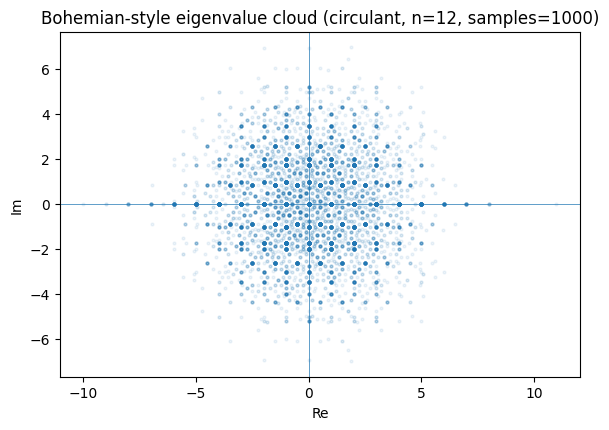

In [9]:
import numpy as np
from numpy.fft import fft
import matplotlib.pyplot as plt

rng = np.random.default_rng(7)

def random_circulant_first_row(n, values=(-1,0,1), p=None):
    """
    Draw first row entries from a small discrete set.
    p can be probabilities matching `values` (default: uniform).
    """
    vals = np.array(values)
    if p is None:
        p = np.ones(len(vals))/len(vals)
    return rng.choice(vals, size=n, p=p)

def bohemian_gallery_circulants(n=20, samples=4000, values=(-1,0,1), p=None):
    pts = []
    for _ in range(samples):
        c = random_circulant_first_row(n, values=values, p=p)
        eigs = fft(c)               # eigenvalues of circ(c)
        pts.append(eigs)
    return np.concatenate(pts)

# --- gallery demo ---
n = 12
samples = 1000
# tweak `values` or `p` for different looks, e.g. values=(-1,0,1,2) or skewed probs
points = bohemian_gallery_circulants(n=n, samples=samples, values=(-1,0,1))

plt.figure(figsize=(6,6))
plt.scatter(points.real, points.imag, s=4, alpha=0.08)
plt.axhline(0, lw=0.5); plt.axvline(0, lw=0.5)
plt.gca().set_aspect('equal', 'box')
plt.title(f"Bohemian-style eigenvalue cloud (circulant, n={n}, samples={samples})")
plt.xlabel("Re"); plt.ylabel("Im")
plt.tight_layout(); plt.show()


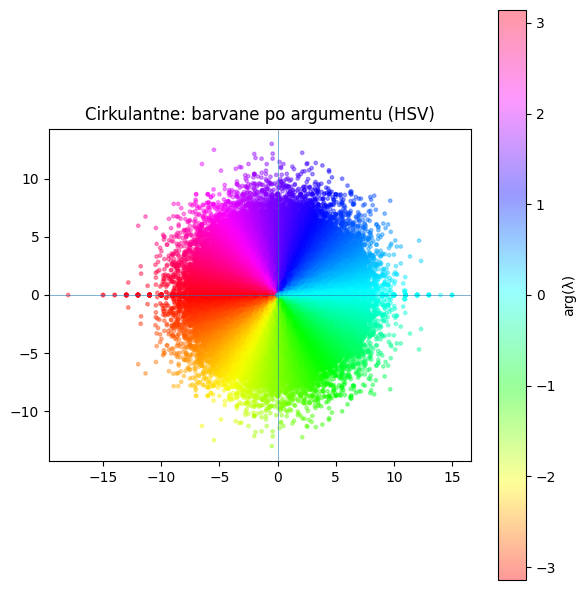

In [10]:
import numpy as np, matplotlib.pyplot as plt
from numpy.fft import fft

def gallery_colored(n=30, samples=3000, values=(-1,0,1)):
    rng = np.random.default_rng(2)
    pts = []
    for _ in range(samples):
        c = rng.choice(values, size=n)
        eig = fft(c)
        pts.append(eig)
    z = np.concatenate(pts)
    ang = np.angle(z)
    plt.figure(figsize=(6,6))
    sc = plt.scatter(z.real, z.imag, s=6, c=ang, cmap="hsv", alpha=0.4)
    plt.axhline(0, lw=0.4); plt.axvline(0, lw=0.4)
    plt.gca().set_aspect('equal', 'box')
    plt.title("Cirkulantne: barvane po argumentu (HSV)")
    plt.colorbar(sc, label="arg(λ)")
    plt.tight_layout(); plt.show()

gallery_colored()


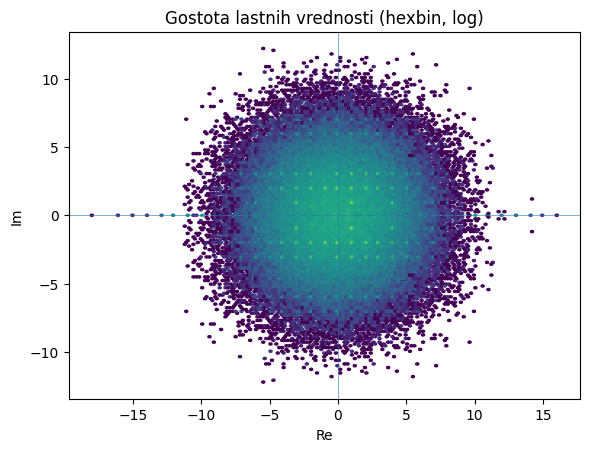

In [11]:
import numpy as np, matplotlib.pyplot as plt
from numpy.fft import fft

def gallery_hexbin(n=28, samples=8000, values=(-1,0,1)):
    rng = np.random.default_rng(3)
    cloud = []
    for _ in range(samples):
        c = rng.choice(values, size=n)
        cloud.append(fft(c))
    z = np.concatenate(cloud)
    plt.figure(figsize=(6,6))
    plt.hexbin(z.real, z.imag, gridsize=160, bins='log')
    plt.axhline(0, lw=0.4); plt.axvline(0, lw=0.4)
    plt.gca().set_aspect('equal', 'box')
    plt.title("Gostota lastnih vrednosti (hexbin, log)")
    plt.xlabel("Re"); plt.ylabel("Im")
    plt.tight_layout(); plt.show()

gallery_hexbin()


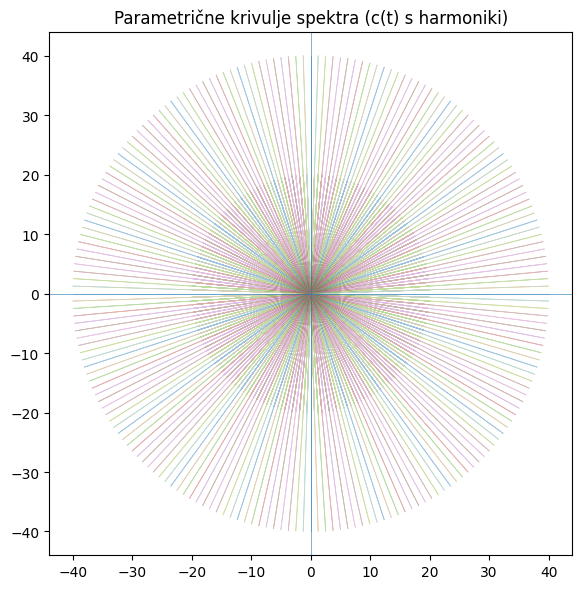

In [12]:
import numpy as np, matplotlib.pyplot as plt
from numpy.fft import fft

def lace_curves(n=40, T=200, k_modes=(1,5,9), amps=(2,1,1)):
    t = np.linspace(0, 2*np.pi, T, endpoint=False)
    plt.figure(figsize=(6,6))
    for tau in t:
        c = np.zeros(n, dtype=float)
        for a,k in zip(amps, k_modes):
            c += a*np.cos(2*np.pi*k*np.arange(n)/n + tau)
        lam = fft(c)
        plt.plot(lam.real, lam.imag, lw=0.6, alpha=0.25)
    plt.axhline(0, lw=0.4); plt.axvline(0, lw=0.4)
    plt.gca().set_aspect('equal', 'box')
    plt.title("Parametrične krivulje spektra (c(t) s harmoniki)")
    plt.tight_layout(); plt.show()

lace_curves()


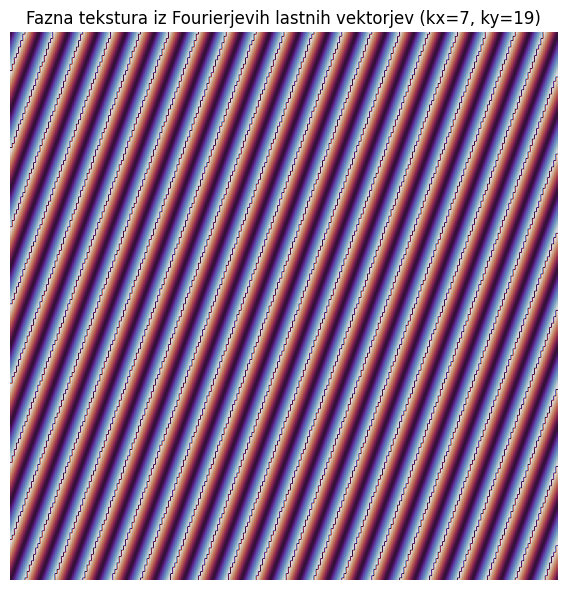

In [15]:
import numpy as np, matplotlib.pyplot as plt

def eigenvector_texture(n=256, kx=7, ky=19):
    x = np.arange(n)
    vx = np.exp(2j*np.pi*kx*x/n)
    vy = np.exp(2j*np.pi*ky*x/n)
    img = np.angle(np.outer(vx, np.conj(vy)))  # fazna razlika
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap="twilight", origin="lower")
    plt.title(f"Fazna tekstura iz Fourierjevih lastnih vektorjev (kx={kx}, ky={ky})")
    plt.axis('off'); plt.tight_layout(); plt.show()

eigenvector_texture()




Lastne vrednosti: [10.+0.j -2.+2.j -2.-2.j -2.+0.j]


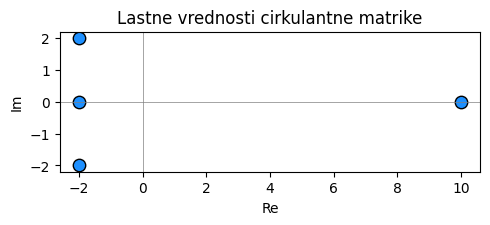

In [20]:
import numpy as np
from scipy.linalg import circulant
import matplotlib.pyplot as plt

# prva vrstica
c = np.array([1, 2, 3, 4])

# cirkulantna matrika
C = circulant(c)

# lastne vrednosti
eigvals = np.linalg.eigvals(C)

# izpis
print("Lastne vrednosti:", np.round(eigvals, 3))

# risanje v kompleksni ravnini
plt.figure(figsize=(5,5))
plt.scatter(eigvals.real, eigvals.imag, color="dodgerblue", s=80, edgecolor="k")
plt.axhline(0, color="gray", lw=0.5)
plt.axvline(0, color="gray", lw=0.5)
plt.gca().set_aspect('equal', 'box')
plt.title("Lastne vrednosti cirkulantne matrike")
plt.xlabel("Re")
plt.ylabel("Im")
plt.tight_layout()
plt.show()


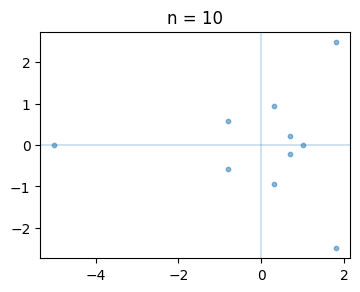

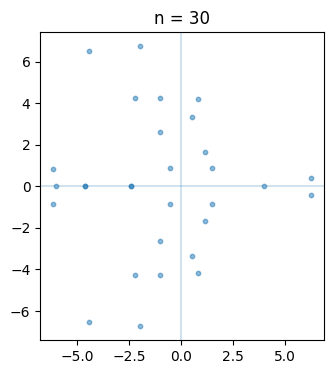

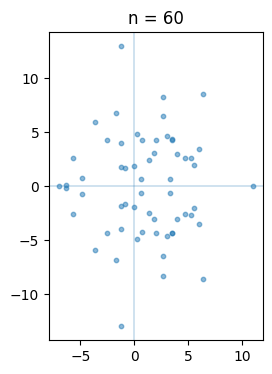

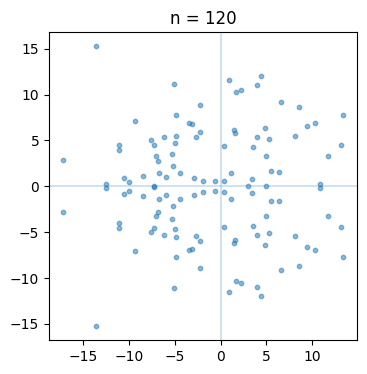

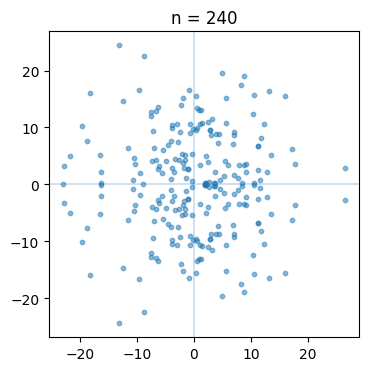

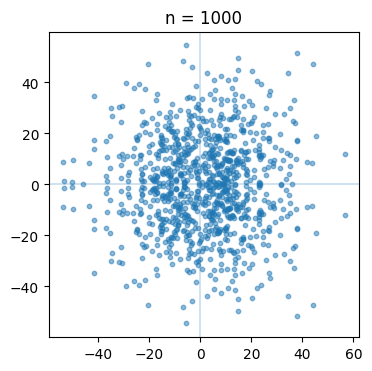

In [2]:
import numpy as np, matplotlib.pyplot as plt
from scipy.linalg import circulant

for n in [10, 30, 60,120,240,1000]:
    c = np.random.randint(-1, 2, size=n)
    eig = np.linalg.eigvals(circulant(c))
    plt.figure(figsize=(4,4))
    plt.scatter(eig.real, eig.imag, s=10, alpha=0.5)
    plt.axhline(0, lw=0.3); plt.axvline(0, lw=0.3)
    plt.gca().set_aspect('equal', 'box')
    plt.title(f"n = {n}")
    plt.show()
